# Speaker Accent Recognition Using MFCCs

## Data Load and summerize 

In [1]:
#importing libs
import numpy as np
import pandas as pd

In [2]:
# import dataset
df = pd.read_csv("C:/Users/mazin/Documents/accent-mfcc-data-1.csv") 

#directly read from uci example
#df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv') 

In [3]:
index = df.index
columns = df.columns
values = df.values

## Peek and Visualize

In [9]:
#dimension of dataset
df.shape #or values.shape

(329, 13)

In [10]:
#peek at the data
df.head(3)

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144


In [11]:
# list the levels for the class
df['language'].unique()

array(['ES', 'FR', 'GE', 'IT', 'UK', 'US'], dtype=object)

In [12]:
# Grab your wav 
from scipy.io import wavfile
mywav = 'C:/Users/mazin/Documents/accent-recognition-mfcc--1/ES-M-1-1.wav'
rate, data = wavfile.read(mywav)
print ('Length in time (s): ', np.shape(data)[0]/float(rate))

Length in time (s):  0.7169160997732427


In [13]:
# pip install ipython
import IPython.display
IPython.display.Audio(data=data,rate=rate)

In [14]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import wave

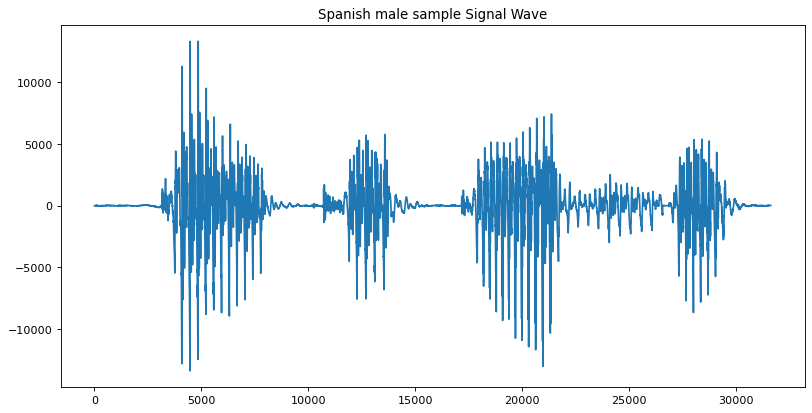

In [15]:
spf = wave.open("C:/Users/mazin/Documents/accent-recognition-mfcc--1/ES-M-1-1.wav", "r")

# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, "Int16")

# plt spanish male wave sample
figure(figsize=(12,6), dpi=80)
plt.title("Spanish male sample Signal Wave")
plt.plot(signal)

plt.show()

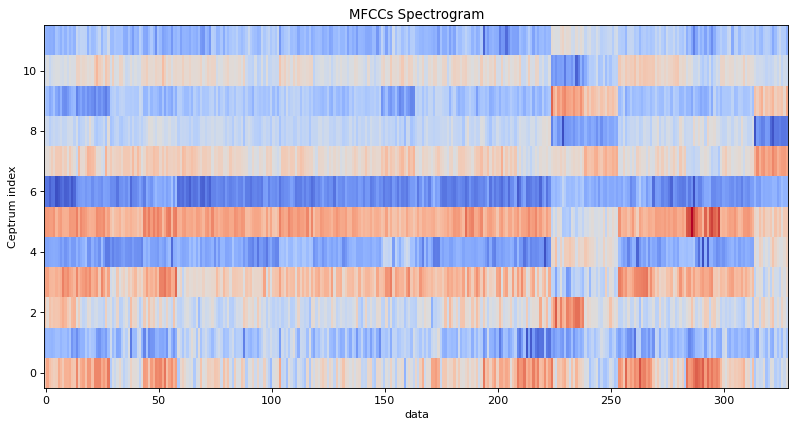

In [16]:
#mfcc spectrogram
from matplotlib import cm

figure(figsize=(12,6), dpi=80)

mfcc_data= np.swapaxes(df.drop(['language'], axis=1), 0 ,1)

# fig, ax = plt.subplots(1,1)
# ex=(-0.5, 326-0.5, 0, 12.5)
# img = plt.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower',extent=ex, aspect='auto')
img = plt.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')

# ax.set_yticklabels(columns)
# ax.set_yticklabels(['X1','X2','X3','X4','X5','X6','X7','X8','X9', 'X10','X11','X12'])
# ax.set_yticklabels(np.arange(1, 12, 1)) 
# ax.set_yticklabels(np.arange(ndim(predictors)))
plt.xlabel('data')
plt.ylabel('Ceptrum index')

plt.title("MFCCs Spectrogram")

plt.show()

<AxesSubplot:>

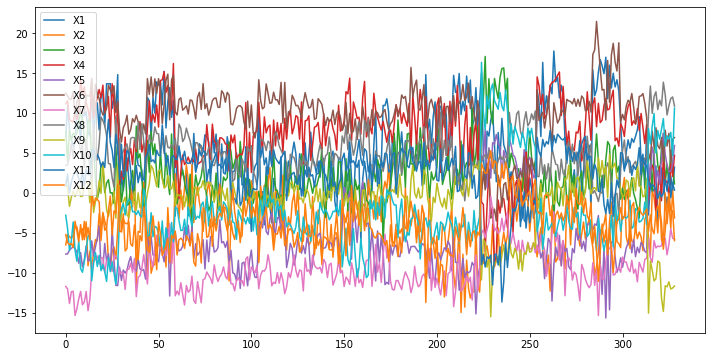

In [17]:
#all MFCCs
df.iloc[:,1:13].plot(figsize=(12,6))

In [18]:
#all MFCCs for US (actually meaningless perche it will cut above diagram into two perche i dati sono ordinati)
# df.iloc[:,1:13][df['language']=='US'].plot(figsize=(15, 10))

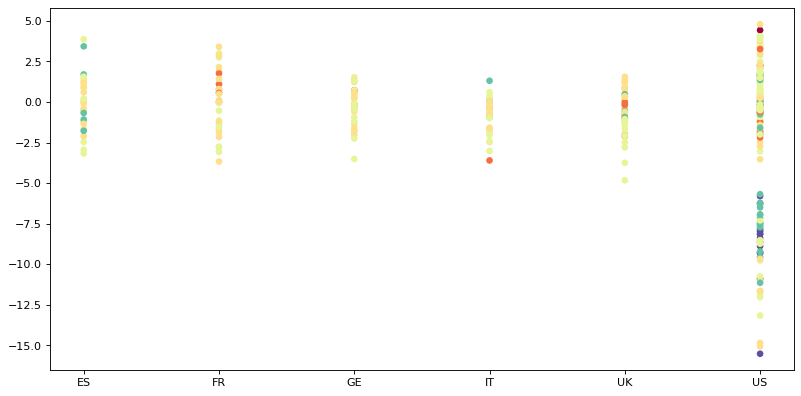

In [19]:
#X10 across all accents

figure(figsize=(12,6), dpi=80)

plt.scatter(df.iloc[:, 0], df.iloc[:, 9],
            c=df.iloc[:,-1:].values.ravel(), 
            edgecolor='none', alpha=1,cmap=plt.cm.get_cmap('Spectral', 6)) 
#alpha transparence level

US    165
UK     45
IT     30
GE     30
FR     30
ES     29
Name: language, dtype: int64


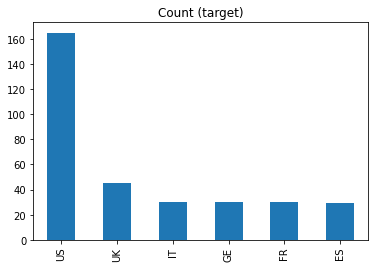

In [20]:
# Class Distribution (imbalance check) (to fix later)
print(df.language.value_counts())
df.language.value_counts().plot(kind='bar', title='Count (target)');

Text(0.5, 1.0, 'Cardinality')

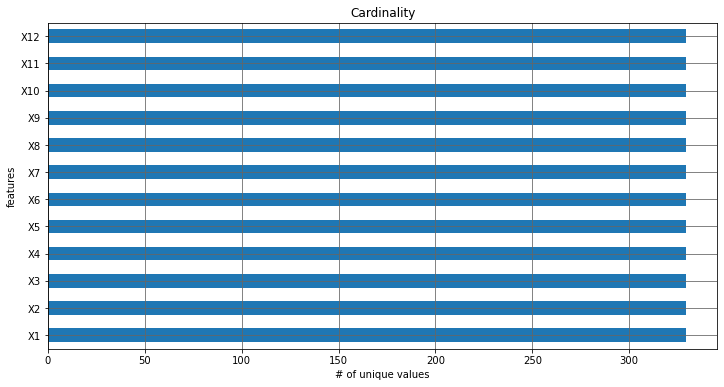

In [31]:
# checking the cardinality of the columns (count unique values in columns)
df.iloc[:,1:13].nunique().plot.barh(figsize=(12,6))

plt.ylabel('features')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.xlabel('# of unique values')
plt.title('Cardinality')

In [32]:
# show classes as percentage sums to 1
print(df.language.value_counts(normalize=True))

US    0.501520
UK    0.136778
IT    0.091185
GE    0.091185
FR    0.091185
ES    0.088146
Name: language, dtype: float64


#### Dimension is 12*329
- low features so don't focus on reduction
- low data -> more data needed (this will be solved by imbalance solving)
-
- US observaions are >> than other classes ==> imbalance to be treated later after remov outliers

##  Data Preperation

In [33]:
#types of attributes
df.dtypes

language     object
X1          float64
X2          float64
X3          float64
X4          float64
X5          float64
X6          float64
X7          float64
X8          float64
X9          float64
X10         float64
X11         float64
X12         float64
dtype: object

**all independent variables are numerical,,,,
change dependant variable "language" to categorial 

In [34]:
#checking missing values 
#that is data=zero in this case because The MFCCs are the amplitudes of the resulting spectrum
#and zero is the only value doesnt make sense in this case

#we know already from UCI page that all data are presented am just following the standard prosudres

print(df.isnull().sum())
#df.columns[df.isnull().sum()>0] index of columns with null

language    0
X1          0
X2          0
X3          0
X4          0
X5          0
X6          0
X7          0
X8          0
X9          0
X10         0
X11         0
X12         0
dtype: int64


no missing data the only thing to check next about data validity is outliers later

In [35]:
# change the target datatype in order to encode 
df["language"] = df["language"].astype('category') 
df.dtypes

language    category
X1           float64
X2           float64
X3           float64
X4           float64
X5           float64
X6           float64
X7           float64
X8           float64
X9           float64
X10          float64
X11          float64
X12          float64
dtype: object

In [36]:
# text coding needed for visualize and process 
language=df['language']

df["language_coded"] = df["language"].cat.codes #add another col holds categories codes (initially will be integer)
df["language_coded"] = df["language_coded"].astype('category')  #(change the col datatype to category)
df=df.drop(['language'], axis=1) # drop the old language col
df.dtypes

X1                 float64
X2                 float64
X3                 float64
X4                 float64
X5                 float64
X6                 float64
X7                 float64
X8                 float64
X9                 float64
X10                float64
X11                float64
X12                float64
language_coded    category
dtype: object

In [37]:
# list new for the class 
df['language_coded'].unique()
print(df.language_coded.value_counts())

5    165
4     45
3     30
2     30
1     30
0     29
Name: language_coded, dtype: int64


['ES', 'FR', 'GE', 'IT', 'UK', 'US'] = [0, 1, 2, 3, 4, 5]

In [38]:
#Statistical Summary
df.describe() 

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,5.645227,-4.270814,2.635319,7.200207,-5.648733,9.810236,-9.408053,5.117328,-1.229432,-2.362288,2.430833,-3.980415
std,5.105302,3.514350,3.635323,4.310095,4.596180,3.624654,2.484117,2.650608,3.634849,5.042034,3.478467,2.985879
min,-6.067831,-14.972962,-6.186583,-8.844231,-15.656596,-3.528964,-15.365665,-2.873862,-15.510974,-11.429178,-13.664104,-13.724103
25%,2.065603,-6.515764,0.137042,4.700874,-8.417684,8.643563,-11.120860,3.482167,-1.749082,-5.083522,1.197789,-5.941409
50%,4.954206,-4.252512,2.029268,7.804680,-6.786670,10.379330,-9.710399,4.843103,-0.389970,-3.323147,3.169703,-4.374334
75%,9.793648,-1.560250,4.178026,10.129165,-4.463308,11.784360,-7.989370,6.588931,0.779993,-1.506037,4.673452,-2.191658
max,17.749851,3.570765,17.066487,16.178942,7.912809,21.445837,-0.424033,13.846083,4.789989,16.326455,9.166066,5.259430


# Outliers Detection

   ## A- Interquartile Range (IQR)

A boxplot can be used to indicate explicitly the presence of outliers. Many inferential procedures are based on the assumption that the population distribution is normal. Even a single extreme outlier/several mild outliers in the sample warns the investigator that such procedures may be unreliable

DEFINITION

Any observation farther than 1.5fs from the closest fourth is an outlier. An outlier is extreme if it is more than 3fs from the nearest fourth, and it is mild otherwise.

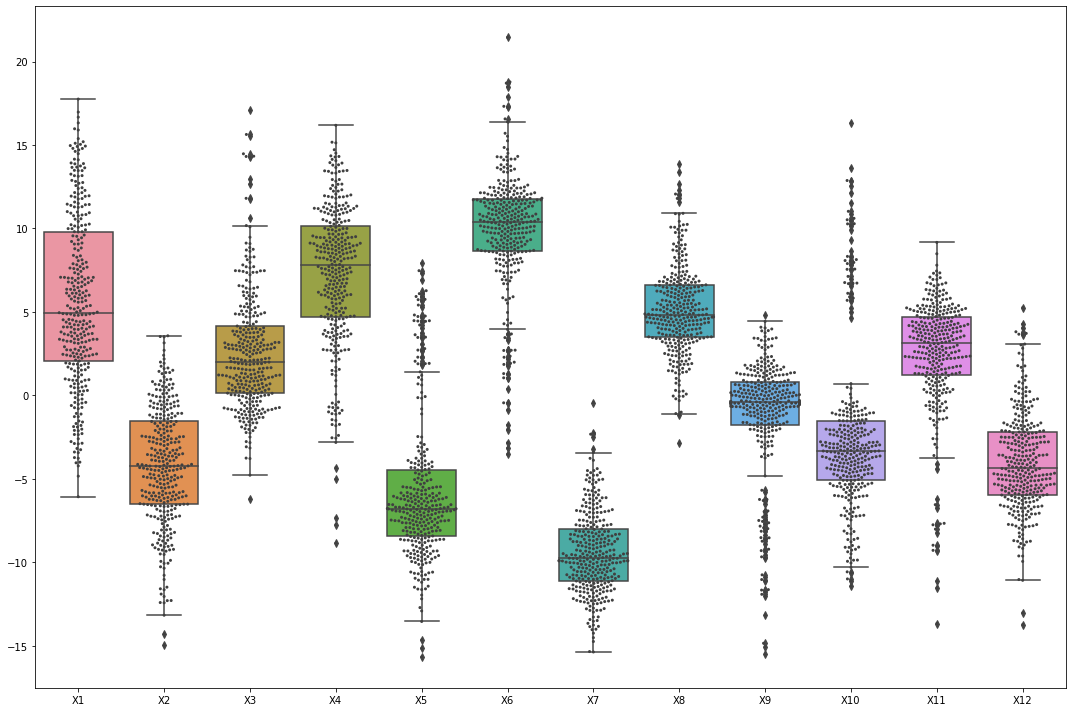

In [39]:
import seaborn as sns

predictors=df.iloc[:,:-1] #df.iloc[:,0:12]
target=df.iloc[:,-1:] #df.iloc[:,12:13]    =#target = 'language_coded'

figure(figsize=(15,10))
# figure(figsize=(12,6), dpi=80)

ax=sns.boxplot(data=predictors)
ax=sns.swarmplot(data=predictors, color=".25", size=3)

plt.tight_layout()

In [40]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
#fact: quantile works on numeric dtypes so df.quantile=predictors.quantile

X1     7.728045
X2     4.955514
X3     4.040984
X4     5.428291
X5     3.954376
X6     3.140798
X7     3.131490
X8     3.106763
X9     2.529075
X10    3.577485
X11    3.475663
X12    3.749751
dtype: float64


signal anomaly detection (unsupervised) like one class svm is commonly used to detect noise but since they claim that signals are noise free and the problem is supervised we skip this part 

In [41]:
def outliers_det(df_,th):
    
    df_2cln = df_.copy()
    predictors_=df_2cln.iloc[:,:-1] 
    Q1 = df_2cln.quantile(0.25)
    Q3 = df_2cln.quantile(0.75)
    IQR = Q3 - Q1
    
    #filter out the outliers by keeping only valid values
    # returns True/False list of rows (329) where false=outlier  (.any changes numbers to boolean)
    inliners=~((predictors_< (Q1 - th * IQR)) |(predictors_> (Q3 + th * IQR))).any(axis=1)

    outliers = []
    for i in range(len(df_2cln)):
        if (inliners[i] == False):
            outliers.append(i)  # index of the outlier

    outliers_idx=np.array(outliers)

    noise_df = df_2cln.index.isin(outliers_idx)
    cln_df = df[inliners] #data split#1
    print('noise-free data split created with length = ',len(cln_df))
    print('outliers = ',len(df_2cln)-len(cln_df))
    print("data filtered percentage ="+"{:.2f}" .format((len(df_2cln)-len(cln_df))/len(df_2cln)))
    return outliers_idx,cln_df,noise_df

In [42]:
outliers_indices_h,noisefree_h_df,outliers_h_df = outliers_det(df,1.5)#1.5 cuts more data & given horrible results on classification (trial and error)

noise-free data split created with length =  261
outliers =  68
data filtered percentage =0.21


In [43]:
# print("Outliers Indices: {}\n".format(outliers_indices_h))

In [44]:
outliers_indices_l,noisefree_l_df,outliers_l_df = outliers_det(df,3) 
            #>3 no significant number of outliers removed (30)
            #<3 accuracy of classification test of the cleaned dataset  < whole dataset (tested ONLY on LDA)
            # another interesting threshold is 3.9 (14 removed) higher accuracy than whole dataset (0.724)
            # but more biased model with train accuracy of 0.73 <0.8 of the whole data
            
            #i consider 3 will cln extreme values

noise-free data split created with length =  299
outliers =  30
data filtered percentage =0.09


In [45]:
print("Outliers Indices: {}\n".format(outliers_indices_l))

Outliers Indices: [224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 244 246 286
 314 316 317 318 321 322 323 324 325 326 327 328]



In [46]:
# print(noisefree_l_df)
#note that indexes of >300 still appears because idx is related to rows and intermediate idx deleted==> idx.shap=261

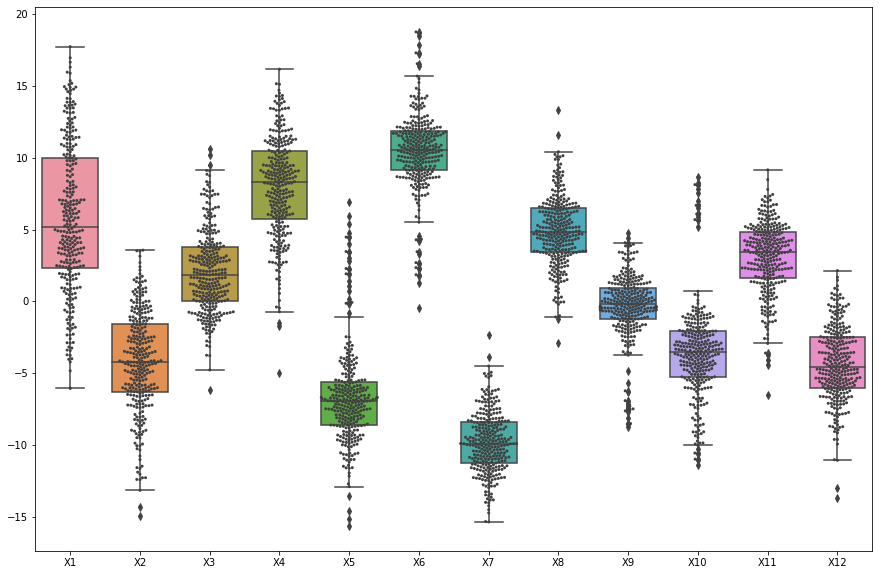

In [47]:
#boxplot of the outliers free dataset
figure(figsize=(15,10))
ax=sns.boxplot(data=noisefree_l_df.drop(columns=['language_coded'],axis=1))
ax=sns.swarmplot(data=noisefree_l_df.drop(columns=['language_coded'],axis=1), color=".25", size=3)

#boxplot of the extreme values clean dataset
#ax=sns.boxplot(data=cln_df_extreme_values.drop(columns=['language_coded'],axis=1))
#ax=sns.swarmplot(data=cln_df_extreme_values.drop(columns=['language_coded'],axis=1), color=".25", size=3)

# B- MD approach

Multivariate outliers can be simply defined as observations having a large squared Mahalanobis distance.

In [48]:
def outliers_maha(df):

    df1=np.array(df)
    cov_matrix = np.cov(df1, rowvar=False) 
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    vars_mean = []
    for i in range(df1.shape[0]):
        vars_mean.append(list(df1.mean(axis=0))) 
    diff = df1 - vars_mean

    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_cov_matrix).dot(diff[i])))

    std = np.std(md)
    k = 2. * std # k = 3. * std if extreme else 2. * std
    m = np.mean(md)
    up_t = m + k
    low_t = m - k
    outliers = []
    for i in range(len(md)):
        if (md[i] >= up_t) or (md[i] <= low_t):
            outliers.append(i)  # index of the outlier

    indices_=np.array(outliers)
    outliers_df = df.index.isin(indices_)

    cln_df = df[~outliers_df]

    print('\nnoise free data split created with length = ',len(cln_df))
    print('cleared data = ',len(df)-len(cln_df))
    print("data filtered percentage ="+"{:.2f}" .format((len(df)-len(cln_df))/len(df)))
    
    return indices_,cln_df,outliers_df

In [49]:
outliers_indices_maha, inliers_maha_df,outliers_maha_df=outliers_maha(df)


noise free data split created with length =  318
cleared data =  11
data filtered percentage =0.03


In [50]:
print("Outliers Indices: {}\n".format(outliers_indices_maha))

Outliers Indices: [124 136 224 226 229 231 232 286 287 295 322]



In [51]:
print("Outliers Indices: {}\n".format(outliers_indices_l))

Outliers Indices: [224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 244 246 286
 314 316 317 318 321 322 323 324 325 326 327 328]



In [52]:
# print(df.index.isin(outliers_indices))
print(df['language_coded'][outliers_l_df].value_counts())
# df['language_coded'][bad_df_1].value_counts().plot(kind='bar', title='Count (target)');
print(df['language_coded'][outliers_h_df].value_counts())
print(df['language_coded'][outliers_maha_df].value_counts())

5    30
4     0
3     0
2     0
1     0
0     0
Name: language_coded, dtype: int64
5    63
0     3
4     2
3     0
2     0
1     0
Name: language_coded, dtype: int64
5    9
4    2
3    0
2    0
1    0
0    0
Name: language_coded, dtype: int64


In [ ]:
outliers_indices=[outliers_indices_h,outliers_indices_maha,np.asarray(index).flatten()]
def commonElements(arr): 
    # initialize result with first array as a set 
    result = set(arr[0]) 
    for currSet in arr[1:]: 
        result.intersection_update(currSet) 
  
    return list(result) 

In [53]:
print("Count of common outliers between IQR & Mahalanobis:", len(commonElements(outliers_indices)))

Count of common outliers between IQR & Mahalanobis: 9


In [54]:
noise = df.index.isin(commonElements(outliers_indices))
noisefree_df = df[~noise]

# Data Distribution

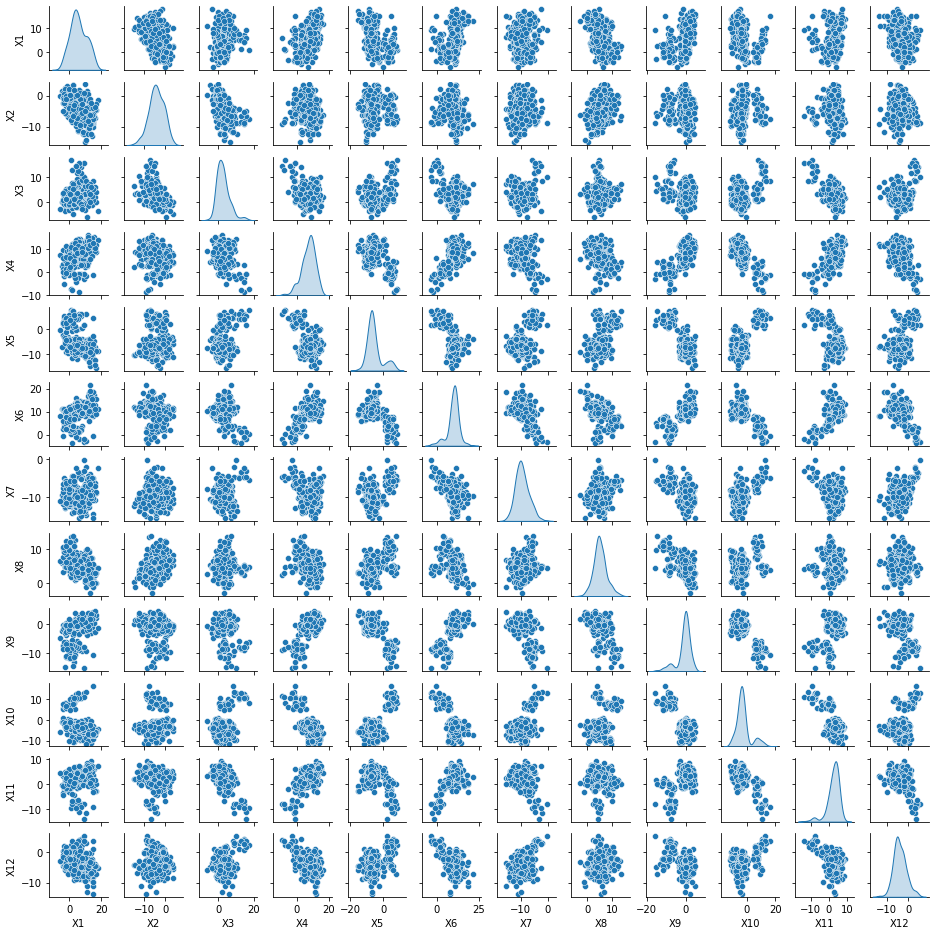

In [55]:
#distribution+correlation
g=sns.pairplot(df, vars=predictors, diag_kind="kde", kind="scatter", height=1.1)

In [56]:
#checking if independent variables are normally distributed

# stats.normaltest function tests the null hypothesis that a sample comes from a normal distribution
#It is based on D’Agostino and Pearson’s test that combines skew and kurtosis 
#to produce an omnibus test of normality

#Usually, a significance level (denoted as α or alpha) of 0.05 (standard) indicates that the risk of concluding 
#the data do not follow a normal distribution—when, actually, the data do follow a normal distribution—is 5%.

from scipy import stats
for i in range(len(df.columns)-1):
    k2, p = stats.normaltest(df.iloc[:,i:i+1])
    alpha = 0.01 #1e-3
    #print("p = {}".format(p))
    print(df.columns[i])
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected") #not normal
    else:
        print("The null hypothesis cannot be rejected") #normal

X1
The null hypothesis can be rejected
X2
The null hypothesis cannot be rejected
X3
The null hypothesis can be rejected
X4
The null hypothesis can be rejected
X5
The null hypothesis can be rejected
X6
The null hypothesis can be rejected
X7
The null hypothesis can be rejected
X8
The null hypothesis can be rejected
X9
The null hypothesis can be rejected
X10
The null hypothesis can be rejected
X11
The null hypothesis can be rejected
X12
The null hypothesis cannot be rejected


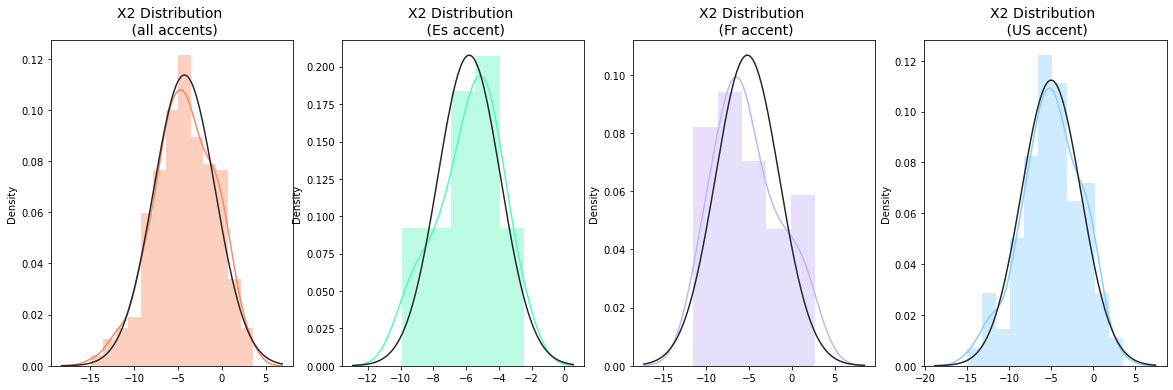

In [57]:
from scipy.stats import norm

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 6))

m1 = df['X2'].values
sns.distplot(m1,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('X2 Distribution \n (all accents)', fontsize=14)

m2 = df['X2'].loc[df['language_coded'] == 0].values
sns.distplot(m2,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('X2 Distribution \n (Es accent)', fontsize=14)

m3 = df['X2'].loc[df['language_coded'] == 1].values
sns.distplot(m3,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('X2 Distribution \n (Fr accent)', fontsize=14)

m4 = df['X2'].loc[df['language_coded'] == 5].values
sns.distplot(m4,ax=ax4, fit=norm, color='#87ceff')
ax4.set_title('X2 Distribution \n (US accent)', fontsize=14)

plt.show()

# Multicollinearity Detection

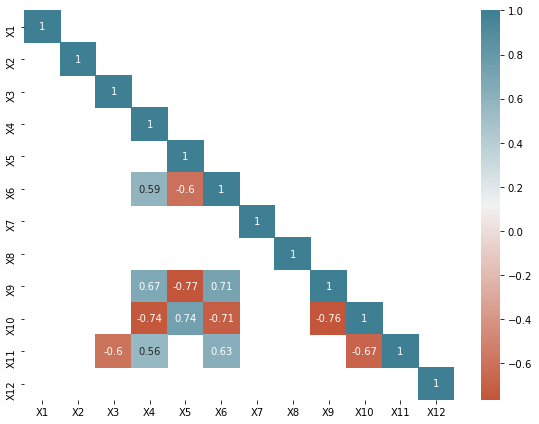

In [58]:
#Corr.Plot of Example Data with only Sig. Correlations Finally plotting with 
#only significant p-value correlation (alpha < .05)
from scipy import stats
def corr_sig(predictors=None):
    p_matrix = np.zeros(shape=(predictors.shape[1],predictors.shape[1]))
    for col in predictors.columns:
        for col2 in predictors.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(predictors[col],predictors[col2])
            p_matrix[predictors.columns.to_list().index(col),predictors.columns.to_list().index(col2)] = p
    return p_matrix

p_values = corr_sig(predictors)
mask = np.invert(np.tril(p_values<0.000000000000000000000000001))

corrmat = predictors.corr()
top_corr_predictors= corrmat.index
plt.figure(figsize=(8,6))

g=sns.heatmap(df[top_corr_predictors].corr(),annot=True,cmap=sns.diverging_palette(20, 220, n=200), mask=mask)
plt.tight_layout()

In [59]:
#function copied from stat.stackexchange.com

from statsmodels.stats.outliers_influence import variance_inflation_factor    
def calculate_vif_(X, thresh=6): #threshold to be tuned between 5 and 10 according to classsification results
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [60]:
r=calculate_vif_(predictors,4) 

dropping 'X6' at index: 5
dropping 'X7' at index: 5
dropping 'X4' at index: 3
dropping 'X8' at index: 4
dropping 'X5' at index: 3
dropping 'X2' at index: 1
dropping 'X10' at index: 3
Remaining variables:
Index(['X1', 'X3', 'X9', 'X11', 'X12'], dtype='object')


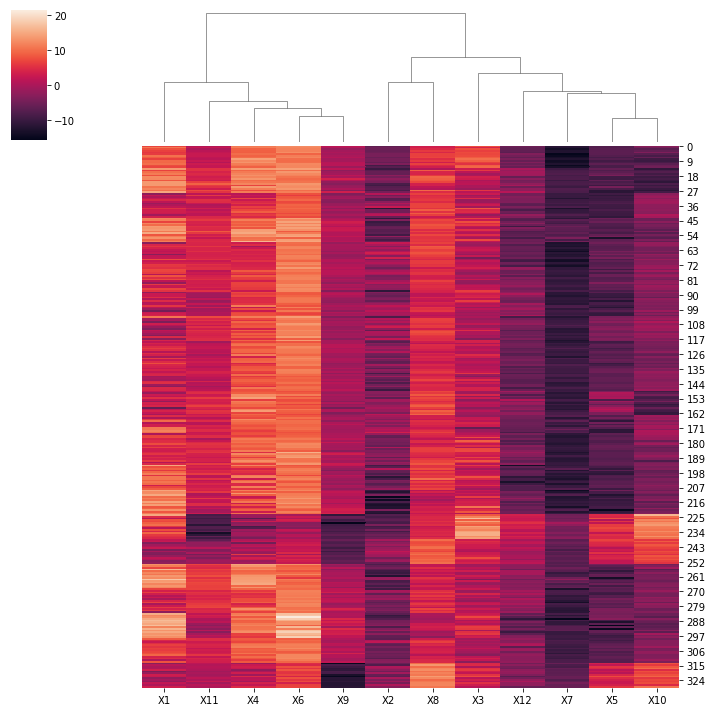

In [61]:
# check multi pairwise method and metrics to find best
g = sns.clustermap(predictors, row_cluster= False,  metric="correlation")
# 7 is a cluster in any euclidean metric calculated based 
# hamming and jaccard and mahalanobis are not working

he mentioned before that to choose which feat to drop could be a matter of trial and error

# dataset subset

In [62]:
# @knn (k=3)
# df_colfree=df.drop(columns=['X4','X5','X6','X7'],axis=1) #bad

#all three comp 
# df_colfree=df.drop(columns=['X4','X5','X6'],axis=1)#0.6752641623609366
# df_colfree=df.drop(columns=['X4','X5','X7'],axis=1)#F1 score on test set: 0.7674608993157381
# df_colfree=df.drop(columns=['X4','X6','X7'],axis=1)#F1 score on test set: 0.7898923444976076
# df_colfree=df.drop(columns=['X5','X6','X7'],axis=1)#0.7070455550781195

#vif only
df_colfree=df.drop(columns=['X6','X7']) #0.8500541125541126
# df_colfree=df.drop(columns=['X4','X6','X7'],axis=1)#F1 score on test set: 0.7898923444976076

# PCA

PCA is unsupervised learning but we can check if transformation can help classifing the accent recognition dataset (if the variance help in seperating classes)

In [65]:
from sklearn.decomposition import PCA

n_components=5
pca = PCA(n_components, random_state=42)

#the following statemend can be done through
#from sklearn.preprocessing import scale, normalize
#norm_predictors = normalize(predictors)

norm_predictors = (predictors - predictors.mean()) / predictors.std()
#pca.fit_transform does not normalize data automatically

X_pca = pca.fit_transform(norm_predictors)
X_pca = pd.DataFrame(X_pca, columns=["PC%d" % (x + 1) for x in range(n_components)]) 

X_pca['language_coded']=df.iloc[:,12:13]

In [66]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[5.49131308 2.03885062 1.04249918 0.8898288  0.64527465]
[0.45760942 0.16990422 0.08687493 0.0741524  0.05377289]
0.8423138612656601


- 4 components are enough to explain about 79% 
- 5 components are enough to explain about 84% 

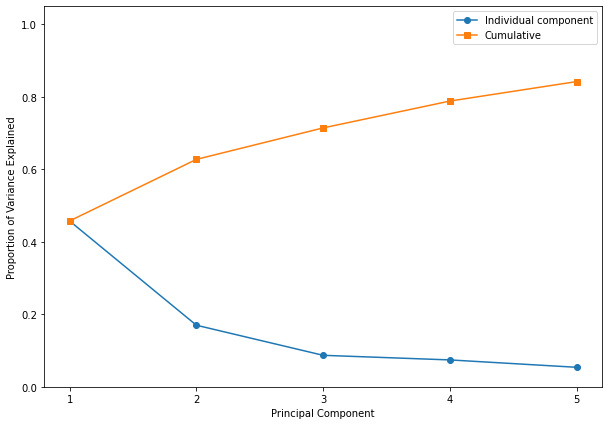

In [67]:
plt.figure(figsize=(10,7))
plt.plot([1,2,3,4,5], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4,5], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')
#1,2,3,4 to avoid PCA1 is at 0 in xscale

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.8,5.2)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5])
plt.legend();

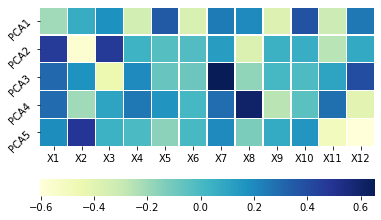

In [68]:
#Effect of original predictors (variables) on each components
#too dark = too positive effect , too light= too negative effect
#to do:just abs() coz all we need now is the effect whether its + or -
ax = sns.heatmap(pca.components_, 
                 linewidths=0.5,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(v) for v in range(1,pca.n_components_+1)],
                 xticklabels=list(predictors.columns),
                 cbar_kws={"orientation": "horizontal"})
plt.setp(ax.get_yticklabels(), rotation=45)
ax.set_aspect("equal")

In [70]:
# heatmap and biplot notes:
# -------------------------
# PCA1 is increased with 5 and 10 and decreased with 4,6,9 (angles)

# This suggests that these five coeffiecient vary together(another sign of correlation...etc). If one increases, then the remaining ones tend to increase/decrease. This component PCA1 can be viewed as a measure of the quality of X4,X5,X6,X9 and X10

# PCA1 is more affected by X9,X10 than X4,X5,X6 (length)  


# PCA2 is increased with +1,+3 and decreased with -2

# PCA3 +7,+12 (from heatmap)
# PCA4 +8,-12

# only 11 left and that's probably why only 80%
# after checking PCA5 explain X11

# will outlier detection, feature selection, dimentiality reduction helps in classification?

# DATASET SPLITS

In [72]:
from sklearn.model_selection import train_test_split as tts

In [73]:
test_size=0.2
random_state=11 #to correcty compare results of the different datasets splits use the same random_state seed (to pick same instances for df,pca,colfree) only noisefree can't pick the same indices

In [107]:
train_data, test_data, train_labels, test_labels = tts(predictors,target, test_size=test_size, stratify=target, random_state=random_state)

In [108]:
colfree_pred=df_colfree.drop('language_coded', axis=1)
colfree_labels = df_colfree['language_coded']
train_colfree, test_colfree, colfree_train_labels, colfree_test_labels = tts(colfree_pred, colfree_labels, test_size=test_size, stratify=colfree_labels, random_state=random_state)
# df_colfree_train = pd.concat([pd.DataFrame(train_colfree), pd.DataFrame(colfree_train_labels)], axis=1) 
# df_colfree_test = pd.concat([pd.DataFrame(test_colfree), pd.DataFrame(colfree_test_labels)], axis=1) 

In [109]:
train_noisefree, test_noisefree, trainlabels_noisefree, testlabels_noisefree = tts(noisefree_df.iloc[:,0:12], noisefree_df.iloc[:,12:13], test_size=test_size, stratify=noisefree_df.iloc[:,12:13], random_state=random_state)

pca for classification

In [111]:
#A4
# pca_train = pd.concat([pd.DataFrame(pca_train_pred), pd.DataFrame(train_labels)], axis=1) 
# pca_to_train = pd.DataFrame(pca_to_train, columns=["PC%d" % (x + 1) for x in range(n_components)]) #data split#5
# pca_train['language_coded']=train_labels
# [pca_train train_labels]

norm_predictors = (train_data - train_data.mean()) / train_data.std()
pca_train = pca.fit_transform(norm_predictors)
# pca_train = pd.DataFrame(pca_train_pred, columns=["PC%d" % (x + 1) for x in range(n_components)])

#B2
# pca_test = pd.concat([pd.DataFrame(pca_test), pd.DataFrame(test_labels)], axis=1) 
# pca_to_test['language_coded']=test_labels
# pca_test['language_coded']=test_labels
# [pca_test test_labels]

norm_predictors = (test_data - test_data.mean()) / test_data.std()
pca_test = pca.fit_transform(norm_predictors)
# pca_test = pd.DataFrame(pca_test, columns=["PC%d" % (x + 1) for x in range(n_components)])

# Classification 

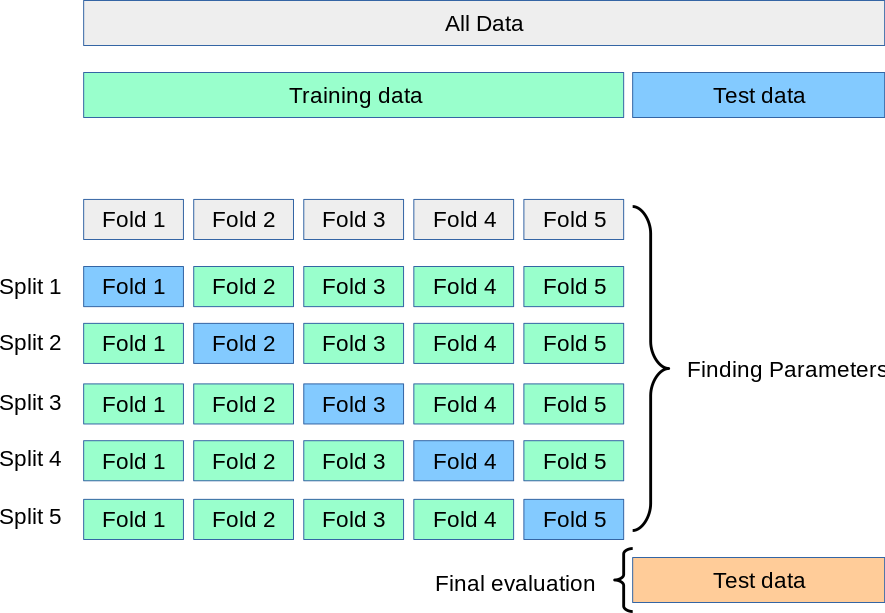

# 1- baseline+candidate datasets among imbalanced splits

should show 
- the effect of colfree+pca+noise free
 

should not show
- scrutny+hyperparameter tuning

In [112]:
datasets={
              'Original dataset':[train_data,train_labels,test_data,test_labels],
              'PCA':[pca_train,train_labels, pca_test,test_labels],
#               'noise-free-low':[train_noisefree_low, trainlabels_noisefree_low, test_noisefree_low, testlabels_noisefree_low],
#               'noise-free-high':[train_noisefree_high, trainlabels_noisefree_high, test_noisefree_high, testlabels_noisefree_high],
#               'noise-free-maha':[train_noisefree_maha, trainlabels_noisefree_maha, test_noisefree_maha, testlabels_noisefree_maha],
              'noise-free':[train_noisefree, trainlabels_noisefree, test_noisefree, testlabels_noisefree],
              'coll-free':[train_colfree, colfree_train_labels, test_colfree,colfree_test_labels]
}

In [113]:
#imalance dataset bible 
# from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import RandomizedSearchCV, cross_val_score,KFold, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

In [114]:
#basline classifiers
classifiers = {
#     "LDA":LinearDiscriminantAnalysis(n_components=2),
#     "LogisiticRegression": LogisticRegression(solver='newton-cg'),
    "KNearest": KNeighborsClassifier(3),#3 ok, 5 overfittting
#     "Support Vector Classifier": SVC(probability=False) #  (probability=False) is compatible with imbalanced dataset 
#      "RBF SVM": SVC(gamma=2, C=1),
#     "Decision Tree":DecisionTreeClassifier(max_depth=5),
#      "Rforest":RandomForestClassifier(), #    random_state= 0
#      "Naive Bayes":GaussianNB(),
#     "QDA":    QuadraticDiscriminantAnalysis(),
              }    

In [116]:
for key in datasets:
#     n=len(all_datasets[key].columns) 
    print('\n dataset:',key) #print('\n dataset:',key, all_datasets[key].shape)
#     train_pred, test_pred, train_labels, test_labels = tts(all_datasets[key].iloc[:,0:n-1], all_datasets[key].iloc[:,n-1:n].values.ravel(), test_size=0.3, stratify=all_datasets[key].iloc[:,n-1:n].values.ravel(), random_state=42)
    train_pred=datasets[key][0]
    train_y=datasets[key][1]
    test_pred=datasets[key][2]
    test_y=datasets[key][3]

# for i in range(len(datasets)):
#     print('dataset',i)
#     n=len(datasets[i].columns)
#     train_pred, test_pred, train_labels, test_labels = tts(datasets[i].iloc[:,0:n-1], datasets[i].iloc[:,n-1:n].values.ravel(), test_size=0.3, stratify=datasets[i].iloc[:,n-1:n].values.ravel(), random_state=42)
    #m = 0
    for key, classifier in classifiers.items():
           #     for name, clf in zip(names, classifiers):
        classifier.fit(train_pred, train_y)      
        training_score = cross_val_score(classifier, train_pred, train_y, cv=6)
#         print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score on default parameters")
#         print("accuracy score on test set:",accuracy_score(test_labels, classifier.predict(test_pred)))
        print("F1 score on test set:",f1_score(test_y, classifier.predict(test_pred), average='weighted'))
#         print("F1 score on test set:",f1_score(test_labels, classifier.predict(test_pred), average='macro'))
#         print("F1 score on test set:",f1_score(test_labels, classifier.predict(test_pred), average='micro'))


 dataset: Original dataset
F1 score on test set: 0.8807853330879647

 dataset: PCA
F1 score on test set: 0.3960697197539303

 dataset: noise-free
F1 score on test set: 0.8130038102535946

 dataset: coll-free
F1 score on test set: 0.7976502997893372


In [ ]:
#CV+grid

#     grid_lda = GridSearchCV(LinearDiscriminantAnalysis(n_components=2), lda_params) #, scoring='f1_weighted'
#     grid_lda.fit(train_pred, train_labels)
#     lda = grid_lda.best_estimator_

#     grid_log_reg = GridSearchCV(LogisticRegression(solver='newton-cg'), log_reg_params)
#     grid_log_reg.fit(train_pred, train_labels)
#     log_reg = grid_log_reg.best_estimator_
    
    grid_knears = RandomizedSearchCV(KNeighborsClassifier(), knears_params) #    grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
    grid_knears.fit(train_pred, train_labels)
    knears_neighbors = grid_knears.best_estimator_
    
#     grid_rf = RandomizedSearchCV(RandomForestClassifier(random_state= 0), rf_params) 
#     grid_rf.fit(train_pred, train_labels)
#     rf = grid_rf.best_estimator_
    
    grid_svc = GridSearchCV(SVC(), svc_params)
    grid_svc.fit(train_pred, train_labels)
    svc = grid_svc.best_estimator_
    
#     lda_score = cross_val_score(lda, train_pred, train_labels, cv=5)
#     print('Lda Cross Validation Score using best model: ', round(lda_score.mean() * 100, 2).astype(str) + '%')
#     print("best model score on test set:",accuracy_score(test_labels, lda.predict(test_pred)))

#     log_reg_score = cross_val_score(log_reg, train_pred, train_labels, cv=5)
#     print('Logistic Regression Cross Validation Score using best model: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')
#     print("best model score on test set:",accuracy_score(test_labels, log_reg.predict(test_pred)))
#     print("best model F1 score on test set:",f1_score(test_labels, log_reg.predict(test_pred), average='weighted'))
    
    knears_score = cross_val_score(knears_neighbors, train_pred, train_labels, cv=5)
    print('Knears Neighbors Cross Validation Score using best model', round(knears_score.mean() * 100, 2).astype(str) + '%')
    print("best model accuracy score on test set:",accuracy_score(test_labels, knears_neighbors.predict(test_pred)))
    print("best model F1 score on test set:",f1_score(test_labels, knears_neighbors.predict(test_pred), average='weighted'))
    
    rf_score = cross_val_score(rf, train_pred, train_labels, cv=5)
    print('RF Cross Validation Score using best model', round(rf_score.mean() * 100, 2).astype(str) + '%')
    print("best model accuracy score on test set:",accuracy_score(test_labels, rf.predict(test_pred)))
    print("best model F1 score on test set:",f1_score(test_labels, rf.predict(test_pred), average='weighted'))
    
#     svc_score = cross_val_score(svc, train_pred, train_labels, cv=5)
#     print('Support Vector Classifier Cross Validation Score using best model', round(svc_score.mean() * 100, 2).astype(str) + '%')
#     print("best model score on test set:",accuracy_score(test_labels, svc.predict(test_pred)))

# the effect of imablanced dataset on classification and correct metric + Using class weights in the loss function of the classifier(s)/evaluation metrics

add to the following the effect using the paper +framework

In [96]:
from sklearn.metrics import confusion_matrix

# train_pred, test_pred, train_labels, test_labels = tts(df.iloc[:,0:12], df.iloc[:,12:13], test_size=0.3, stratify=df.iloc[:,12:13], random_state=42)
    
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(train_data, train_labels)

cm=confusion_matrix(test_labels, lda.predict(test_data),labels=[0,1,2,3,4,5])
classes=['ES','FR','GE','IT','UK','US']

plt.figure(figsize=(8,6))

sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues',xticklabels=classes, yticklabels=classes);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(f1_score(test_labels, lda.predict(test_data), average='weighted'))
plt.title(all_sample_title, size = 10);

plt.tight_layout()

NameError: name 'LinearDiscriminantAnalysis' is not defined

In [97]:
# # train_pred, test_pred, train_labels, test_labels = tts(df.iloc[:,0:12], df.iloc[:,12:13], test_size=0.3, stratify=df.iloc[:,12:13], random_state=42)
    
# knn = KNeighborsClassifier(3)
# knn.fit(train_pred, train_labels)


# plt.figure(figsize=(8,6))
# cm=confusion_matrix(test_labels, knn.predict(test_pred),labels=[0,1,2,3,4,5])
# classes=['ES','FR','GE','IT','UK','US']
# sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues',xticklabels=classes, yticklabels=classes);
# plt.ylabel('Actual label');
# plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}'.format(f1_score(test_labels, knn.predict(test_pred), average='weighted'))
# plt.title(all_sample_title, size = 10);

# plt.tight_layout()

In [165]:
# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           cmap=plt.cm.Blues):
#     #set normalize to true if wanted
#     import itertools
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         title="Normalized confusion matrix"
#     else:
#         title='Un-normalized Confusion matrix'
        
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black") #ensure number is readable no mater backg color
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     plt.tight_layout()

In [167]:
# np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plt.figure(figsize=(7,5))
# plot_confusion_matrix(cm, classes=['ES', 'Fr', 'GE', 'IT', 'UK','US'])

# Dataset Balancing (Augumentation) 

- SMOTE
- Adaptive Synthetic Sampling (ADASYN)

In [83]:
# summarize class distribution
from collections import Counter
counter = Counter(language)
print(counter)

print(df.language_coded.value_counts(normalize=True))

Counter({'US': 165, 'UK': 45, 'FR': 30, 'GE': 30, 'IT': 30, 'ES': 29})
5    0.501520
4    0.136778
3    0.091185
2    0.091185
1    0.091185
0    0.088146
Name: language_coded, dtype: float64


SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors(typically 5). The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

In [84]:
# conda install -c glemaitre imbalanced-learn

SMOTE over-sampling:
5    165
4    165
3    165
2    165
1    165
0    165
Name: language_coded, dtype: int64


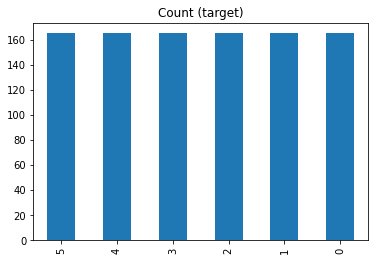

In [85]:
# import imblearn
from imblearn.over_sampling import SMOTE

X = df.drop('language_coded', axis=1)
Y = df['language_coded']

sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X, Y)

df_balanced = pd.concat([pd.DataFrame(X_res), pd.DataFrame(Y_res, columns=['language_coded'])], axis=1) #data split#4

print('SMOTE over-sampling:')
print(df_balanced.language_coded.value_counts())

df_balanced.language_coded.value_counts().plot(kind='bar', title='Count (target)');

In [86]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state = 101)
x_adasyn, y_adasyn = adasyn.fit_resample(X, Y)
df_adasyn= pd.concat([pd.DataFrame(x_adasyn), pd.DataFrame(y_adasyn, columns=['language_coded'])], axis=1) 

In [87]:
# plt.figure(figsize=(15,10))

# ax=sns.boxplot(data=df_balanced)
# ax=sns.swarmplot(data=df_balanced, color=".25", size=3)

# plt.tight_layout()

SMOTE, ADA

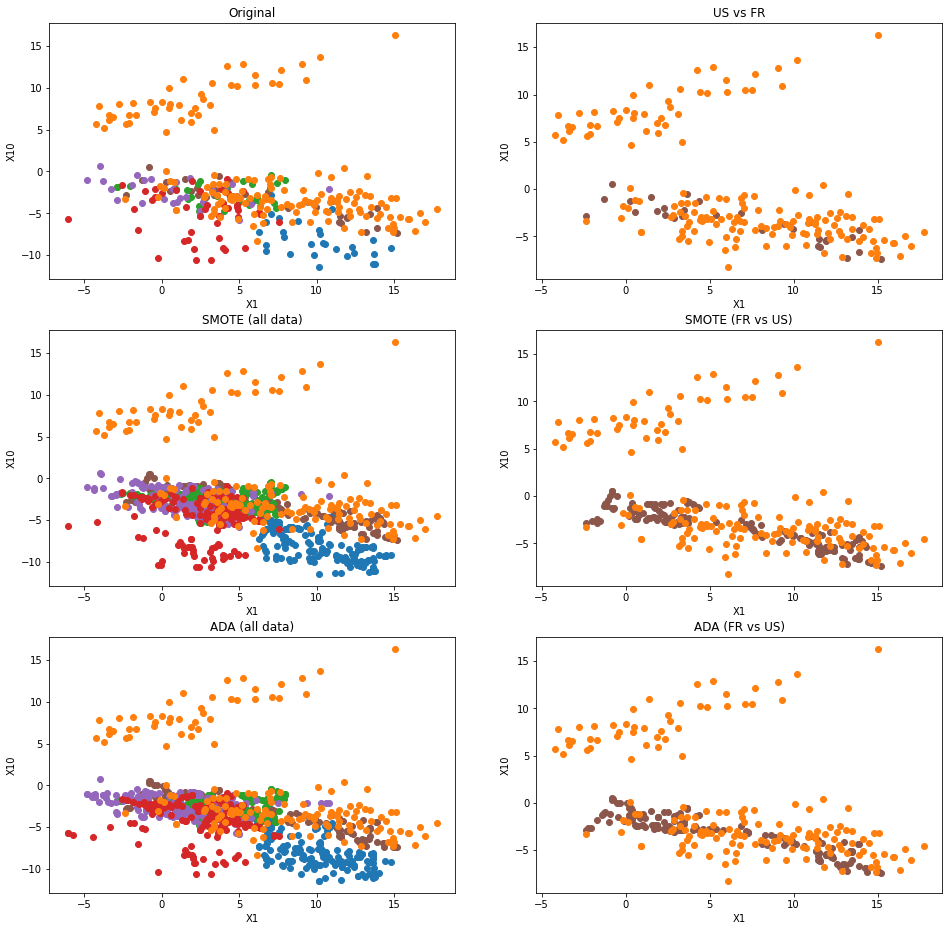

<Figure size 432x288 with 0 Axes>

In [88]:
from numpy import where

fig, axs = plt.subplots(3,2,figsize=(16,16))

# scatter plot of examples by class label
from numpy import array
g = array(predictors.values.tolist())
k = language.values.tolist() 
k=np.array(k).T

import itertools
colors = itertools.cycle(["tab:blue", "tab:brown", "tab:green", "tab:purple","tab:red","tab:orange"])
colors_ = itertools.cycle(["tab:brown", "tab:orange"])

from collections import Counter
for label, _ in counter.items():
    row_ix = where(k == label)[0]
    axs[0,0].scatter(g[row_ix, 0], g[row_ix, 9], label=str(label), color=next(colors)) #X1 ,X10 choosen from orange 'find informative projections'
    axs[0,0].set(xlabel='X1', ylabel='X10', title='Original')

for label in ['FR','US']:    
    row_ix = where(k == label)[0]
    axs[0,1].scatter(g[row_ix, 0], g[row_ix, 9], label=str(label), color=next(colors_))
    axs[0,1].set(xlabel='X1', ylabel='X10', title='US vs FR')

oversample = SMOTE()
g_smote, k_smote = oversample.fit_resample(g, k)

# for label, _ in counter.items():
for label in ['FR','US']:    
    row_ix = where(k_smote == label)[0]
    axs[1,1].scatter(g_smote[row_ix, 0], g_smote[row_ix, 9], label=str(label), color=next(colors_))
    axs[1,1].set(xlabel='X1', ylabel='X10', title='SMOTE (FR vs US)')
    
    
for label, _ in counter.items():
    row_ix = where(k_smote == label)[0]
    axs[1,0].scatter(g_smote[row_ix, 0], g_smote[row_ix, 9], label=str(label), color=next(colors)) #X1 ,X10 choosen from orange 'find informative projections'
    axs[1,0].set(xlabel='X1', ylabel='X10', title='SMOTE (all data)')

from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state = 101)
g_adasyn, k_adasyn = adasyn.fit_resample(g, k)

for label in ['FR','US']:    
    row_ix = where(k_adasyn == label)[0]
    axs[2,1].scatter(g_adasyn[row_ix, 0], g_adasyn[row_ix, 9], label=str(label), color=next(colors_))
    axs[2,1].set(xlabel='X1', ylabel='X10', title='ADA (FR vs US)')
    

for label, _ in counter.items():
    row_ix = where(k_adasyn == label)[0]
    axs[2,0].scatter(g_adasyn[row_ix, 0], g_adasyn[row_ix, 9], label=str(label), color=next(colors)) #X1 ,X10 choosen from orange 'find informative projections'
    axs[2,0].set(xlabel='X1', ylabel='X10', title='ADA (all data)')


# plt.legend('upper right')
# handles, labels = axs.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')
plt.show()
plt.tight_layout()

In [89]:
# print(np.array_equal(n,l))
#smote generates different arrays every smote

# the right way to do Cross validation with SMOTE

-oversampled  datasets

In [90]:
# # smote pca
# X = pca_train
# Y = train_labels
sm = SMOTE(random_state=42)
# pcax_res, pcay_res = sm.fit_resample(X, Y)

#original smoted
X_res, Y_res = sm.fit_resample(train_data, train_labels)
# df_smoted = pd.concat([pd.DataFrame(X_res), pd.DataFrame(Y_res, columns=['language_coded'])], axis=1) 
# [X_res, Y_res]

#original adasyn
x_adasyn, y_adasyn = adasyn.fit_resample(train_data, train_labels)
# df_adasyn= pd.concat([pd.DataFrame(x_adasyn), pd.DataFrame(y_adasyn, columns=['language_coded'])], axis=1) 
# [x_adasyn, y_adasyn]

# compare datasets

In [317]:
# all_datasets={
#               'Original dataset':[A1,B1],
#               'coll-free':[C1,D1],
#               'PCA':[A4,B2],
#               'SMOTE':[A2,B1],
#               'ADA':[A3,B1],
#              }

datasets={
              'Original dataset':[train_data,train_labels,test_data,test_labels],
#               'coll-free':[train_colfree, colfree_train_labels, test_colfree,colfree_test_labels],
#               'noise-free-low':[train_noisefree_low, trainlabels_noisefree_low, test_noisefree_low, testlabels_noisefree_low],
#               'noise-free-maha':[train_noisefree_maha, trainlabels_noisefree_maha, test_noisefree_maha, testlabels_noisefree_maha],
#               'noise-free-all':[train_noisefree_all, trainlabels_noisefree_all, test_noisefree_all, testlabels_noisefree_all],
              'SMOTE':[X_res, Y_res, test_data, test_labels],
              'ADA':[x_adasyn, y_adasyn, test_data, test_labels],
}
# all_datasets={
#               'Original dataset':[train_data,train_labels,test_data,test_labels],
#               'coll-free':[train_colfree, colfree_train_labels, test_colfree,colfree_test_labels],
#               'PCA':[pca_train,train_labels, pca_test,test_labels],
# #               'SMOTEd PCA':[pcax_res, pcay_res, pca_test, test_labels],
# #               'SMOTE':[X_es, Y_res, test_data, test_labels],
# #               'ADA':[x_adasyn, y_adasyn, test_data, test_labels],
#              }

In [ ]:
# from sklearn import preprocessing
# df.iloc[:,0:12]=preprocessing.normalize(df.iloc[:,0:12])
# cln_df_extreme_values.iloc[:,0:12]=preprocessing.normalize(cln_df_extreme_values.iloc[:,0:12])
# cln_df.iloc[:,0:12]=preprocessing.normalize(cln_df.iloc[:,0:12])
# df_colfree.iloc[:,0:9]=preprocessing.normalize(df_colfree.iloc[:,0:9])

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:,0:12]=scaler.fit_transform(df.iloc[:,0:12])
cln_df_extreme_values.iloc[:,0:12]=scaler.fit_transform(cln_df_extreme_values.iloc[:,0:12])
cln_df.iloc[:,0:12]=scaler.fit_transform(cln_df.iloc[:,0:12])
df_colfree.iloc[:,0:9]=scaler.fit_transform(df_colfree.iloc[:,0:9])

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled=scaler.fit_transform(df.iloc[:,0:12])
df.iloc[:,0:12].equals(df_scaled)

False

In [ ]:
#basline classifiers
classifiers = {
        "KNearest": KNeighborsClassifier(),
        "LogisiticRegression": LogisticRegression(solver='newton-cg'),
        "Support Vector Classifier": SVC() #  (probability=False) is compatible with imbalanced dataset 
        "Decision Tree":DecisionTreeClassifier(),
        "Rforest":RandomForestClassifier(), #    random_state= 0
        "LDA":LinearDiscriminantAnalysis(n_components=2),
        "QDA":QuadraticDiscriminantAnalysis(),
              }    

In [201]:
 # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 800, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


knears_params = {"n_neighbors": list(range(3,7,2))}
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],"solver":['sag' ,'saga', 'liblinear'] }
# random_state int, RandomState instance, default=None
solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
# log_reg_params = { 'C': [0.1, 1, 10]} #, 0.01, 0.1, 1, 10, 100, 1000    "penalty": ['l1','l2'], # l1 lasso l2 ridge
svc_params = {'C': np.logspace(1, 3, 3), 'kernel': ['rbf', 'linear'],'gamma':np.logspace(-3, -1, 3)}
tree_params= {
             "criterion":['gini','entropy'],
             "max_depth":[None,1,2,3,4,5,6,7,8,9,10],
#               range(1,10),
             "min_samples_split":range(1,10),
             "min_samples_leaf":range(1,5)
             }

rf_params = {'n_estimators': n_estimators,
               'max_features': max_features,
#                'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

lda_params={'solver':['lsqr','eigen','svd']}
qda_params={}

splits=6
rndst=11

In [ ]:
params = {knears_params,log_reg_params,svc_params,tree_params,rf_params,lda_params,qda_params}

In [203]:
#imalance dataset bible 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

In [ ]:
sss = StratifiedKFold(n_splits=splits, random_state=rndst, shuffle=True) 

#to understand
#https://stackoverflow.com/questions/45969390/difference-between-stratifiedkfold-and-stratifiedshufflesplit-in-sklearn
# sss = StratifiedKFold(n_splits=5, shuffle=False)

for key in datasets:
    train_pred=datasets[key][0]
    train_y=datasets[key][1]
    test_pred=datasets[key][2]
    test_y=datasets[key][3]
    

    for train_index, test_index in sss.split(train_pred, train_y):
    #     print("Train:", train_index, "Test:", test_index)
        original_Xtrain, original_Xtest = train_pred.iloc[train_index], train_pred.iloc[test_index]
        original_ytrain, original_ytest = train_y.iloc[train_index], train_y.iloc[test_index]

    original_Xtrain = original_Xtrain.values
    original_Xtest = original_Xtest.values
    original_ytrain = original_ytrain.values
    original_ytest = original_ytest.values

#     print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
#     print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

    # List to append the score and then find the average
    accuracy_lst = []
    precision_lst = []
    recall_lst = []
    f1_lst = []
    auc_lst = []

    cross=[]
    # Classifier with optimal parameters
    # log_reg_sm = grid_log_reg.best_estimator_
    # log_reg_params = {'C': [0.1, 1, 10]}
    # rand_log_reg = GridSearchCV(LogisticRegression(solver='newton-cg'), log_reg_params)

#     grid_knears = RandomizedSearchCV(KNeighborsClassifier(), knears_params)
    # grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)

    # grid_rf = GridSearchCV(RandomForestClassifier(), rf_params) RandomForestClassifier(random_state= 0)
    # grid_rf = RandomizedSearchCV(RandomForestClassifier(), rf_params) #RandomForestClassifier(random_state= 0)

    # Implementing SMOTE  
    # Cross Validating the right way
    for key,classifier,params in zip(classifiers.items(),params.items()):

        for train, test in sss.split(original_Xtrain, original_ytrain):
            pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), GridSearchCV(Classifier, params) )
#             pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), grid_knears ) # SMOTE happens during Cross Validation not before..
            model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
            best_est = grid_knears.best_estimator_
            prediction = best_est.predict(original_Xtrain[test])

        #     cross.append(cross_val_score(pipeline, original_Xtrain, y_train, scoring='recall', cv=sss))

        #     accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
        #     precision_lst.append(precision_score(original_ytrain[test], prediction,average='weighted'))
        #     recall_lst.append(recall_score(original_ytrain[test], prediction,average='weighted'))
            f1_lst.append(f1_score(original_ytrain[test], prediction,average='weighted')) #weighted is the best calculated on KNN+6folds
        #     auc_lst.append(roc_auc_score(original_ytrain[test], best_est.predict_proba(original_Xtrain[test]), multi_class='ovo'))

        print('---' * 45)
        print(key)
        print("accuracy: {}".format(np.mean(accuracy_lst)))
        print("precision: {}".format(np.mean(precision_lst)))
        print("recall: {}".format(np.mean(recall_lst)))
        print("f1: {}".format(np.mean(f1_lst)))
        print('---' * 45)

In [ ]:
print("best model F1 score on test set:",f1_score(original_ytest, best_est.predict(original_Xtest), average='weighted'))

# Results

In [ ]:
#learning curve plot (source sklearn)

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve



def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="blue")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("RandomForest Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("XGBoost Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
plot_learning_curve(lda, log_reg, knears_neighbors, svc, train_pred, train_labels, (0.3, 1.01), cv=cv, n_jobs=4)

In [ ]:
from sklearn.metrics import roc_auc_score

print('LDA: ', roc_auc_score(train_labels, lda.predict_proba(train_pred), multi_class='ovo'))
print('Logistic Regression: ', roc_auc_score(train_labels, log_reg.predict_proba(train_pred), multi_class='ovo'))
print('KNears Neighbors: ', roc_auc_score(train_labels,  knears_neighbors.predict_proba(train_pred), multi_class='ovo'))
print('Support Vector Classifier: ', roc_auc_score(train_labels, svc.predict_proba(train_pred), multi_class='ovo'))
#svm has no learning curve

In [85]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from itertools import cycle
from scipy import interp

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc

In [ ]:

#%matplotlib inline

n_classes = 6

train_labels = label_binarize(train_labels, classes=[*range(n_classes)])
test_labels = label_binarize(test_labels, classes=[*range(n_classes)])

# log_reg = OneVsRestClassifier(log_reg)
# knears_neighbors = OneVsRestClassifier(knears_neighbors)
# svc = OneVsRestClassifier(svc)
# clf.fit(X_train, y_train)

y_score = log_reg.predict_proba(test_pred)

fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i],
                                  y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=2,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_prob = log_reg.predict_proba(train_pred)

macro_roc_auc_ovo = roc_auc_score(train_labels, y_prob, multi_class="ovo",average="macro")
weighted_roc_auc_ovo = roc_auc_score(train_labels, y_prob, multi_class="ovo",average="weighted")
macro_roc_auc_ovr = roc_auc_score(train_labels, y_prob, multi_class="ovr",average="macro")
weighted_roc_auc_ovr = roc_auc_score(train_labels, y_prob, multi_class="ovr",average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

In [ ]:
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(test_labels[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

labels = ['0', '1', '2', '3', '4', '5']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

In [ ]:
#draw LDA with centroid


# PAGE 107. Figure 4.4. A two-dimensional plot of the vowel training data.
#           There are eleven classes with X in R^10, and this is the best view
#           in terms of LDA model (Section 4.3.3). The heavy circles are the
#           projected means vectors for each classes. The class overlap is
#           considerable.
X_reduced = lda.transform(X_train)
means = lda.transform(lda.means_)

# define colors for classes
colors = np.array([
    '#000000', '#0000FF', '#A52A2A', '#A020F0', '#FF8C00', '#00FFFF',
    '#708090', '#FFEC8B', '#000000', '#FF0000', '#00FF00'])
fig, ax = plt.subplots(figsize=(4.5, 3.65), dpi=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], facecolors='none',
           edgecolors=colors[y_train], s=5, linewidth=0.6)
ax.scatter(means[:, 0], means[:, 1], facecolors='none', edgecolors=colors,
           s=5, linewidth=5)
for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(6)
ax.text(-4.89, 4.4, 'Linear Discriminant Analysis', color=GRAY4, fontsize=9)
ax.set_xlabel('Coordinate 1 for Training Data', color=GRAY4, fontsize=8)
_ = ax.set_ylabel('Coordinate 2 for Training Data', color=GRAY4, fontsize=8)

In [ ]:
#linear models summary (idea order your classification by linear..etc )
# PAGE 107. TABLE 4.1. Training and test error rates using a variety of linear
#           techniques on the vowel data. There are eleven classes in ten
#           dimensions, of which three account for 90% of the variance (via a
#           principal component analysis). We see that linear regression is
#           hurt by masking, increasing the test and training error by over
#           10%.
models = ['Linear regression', 'Linear discriminant analysis',
          'Quadratic discriminant analysis', 'Logistic regression']
train_errors = [lr_train_error, lda_train_error, qda_train_error,
                logreg_train_error]
test_errors = [lr_test_error, lda_test_error, qda_test_error,
               logreg_test_error]
print('                      Technique     Error Rates')
print('                                  Traing     Test')
for model, train_error, test_error in zip(models, train_errors, test_errors):
    print(f'{model:>31}   {train_error:.2f} {test_error:>10.2f}')

In [ ]:
features = [f'X{i+1}' for i in range(12)]
X=df[features].values
print(X)
target ='language_coded'
y=df[target].values